# Pymaceuticals Analysis

    - For mice on the Capomulin regimen, mouse weight has a correlation coefficient of 0.84 which shows a strong coerrelation
    - Ramicane and Capomulin appear to be the most viable drug regimens in the study. Ramicane has slightly lower values in the       summary statistics table
    - Out of the 4 regimens included in the box plots, Ceftamin appears to have the largest interquartile range which suggests 
      the largest variance in results for tumor volume. I would recommend that it is not an effective regimen.


In [62]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [63]:
#Create File Paths
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

In [64]:
#Merge two tables into one based on mouse ID
merged_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merged_mouse_data.set_index('Mouse ID').head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [65]:
#Check number of mice
merged_mouse_data['Mouse ID'].nunique()

249

In [66]:
#Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint
#Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_mouse_data[merged_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [67]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Dropping all data for Mouse ID g989 due to duplicated Timepoints that have differing Tumor Volume values. If Tumor Volume values 
#were same at each Timepoint, I would remove only the duplicated rows.

clean_mouse_data = merged_mouse_data[merged_mouse_data['Mouse ID'] != 'g989']
clean_mouse_data.set_index('Mouse ID').head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [68]:
#Recheck the number of mice in the clean DataFrame.

clean_mouse_data['Mouse ID'].nunique()

248

In [69]:
#Calculate mean, median, variance, standard deviation, SEM of Tumor Volume for each Regimen
tumor_mean = clean_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_variance = clean_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = clean_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_SEM = clean_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

#Generate a summary statistics table of Tumor Volume for each Regimen

summary_table = pd.DataFrame({'Tumor Mean':tumor_mean, 'Tumor Median':tumor_median, 'Tumor Variance':tumor_variance, 'Tumor Standard Deviation':tumor_std, 'Tumor SEM':tumor_SEM})
summary_table

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


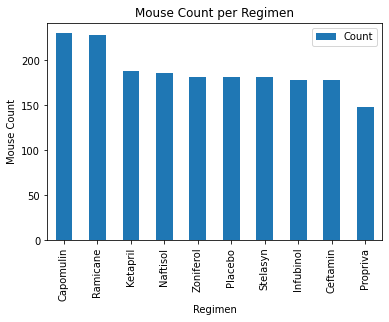

In [70]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
#Create new DataFrame that captures value count of Drug Regimen to be used in Pandas and PyPlot bar charts
count = clean_mouse_data['Drug Regimen'].value_counts()
regimen_count = pd.DataFrame({'Count': count})

#Use new DF to create Pandas bar chart 
count_chart=regimen_count.plot(kind='bar')

#Add chart and axis titles
plt.title('Mouse Count per Regimen')
count_chart.set_xlabel('Regimen')
count_chart.set_ylabel('Mouse Count')
plt.show()


Text(0, 0.5, 'Mouse Count')

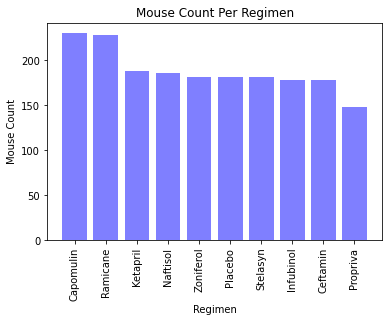

In [71]:
#Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(regimen_count))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_count["Count"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, regimen_count.index, rotation="vertical")

plt.title('Mouse Count Per Regimen')
plt.xlabel('Regimen')
plt.ylabel('Mouse Count')

array([<AxesSubplot:ylabel='Count'>], dtype=object)

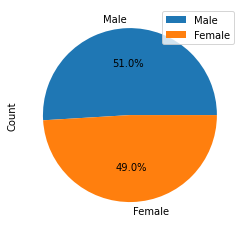

In [72]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
#Create new DF of mouse sex to use for Pandas and PyPlot charts
sex = clean_mouse_data['Sex'].value_counts()
sex_count = pd.DataFrame({'Count': sex})
sex_count

#Pandas Pie Chart 
sex_count.plot.pie(subplots=True,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x22a6db0d5c0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

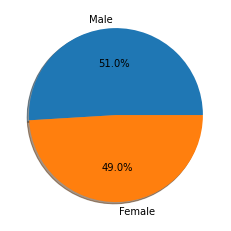

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=sex_count.index
plt.pie(sex_count['Count'], labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=0)

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimen = pd.DataFrame(clean_mouse_data.loc[clean_mouse_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])])

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = treatment_regimen.groupby('Mouse ID').max()['Timepoint']
last_timepoint = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint, treatment_regimen, on=('Mouse ID', 'Timepoint'))
tumor_volume = tumor_volume[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543


In [94]:
#Calculate IQR and potential outliers for each of the 4 drugs
capomulin= tumor_volume.loc[tumor_volume['Drug Regimen']== 'Capomulin']
ca_tumor_volume = capomulin['Tumor Volume (mm3)']

capomulin_quartiles=ca_tumor_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomlin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomlin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)


ramicane= tumor_volume.loc[tumor_volume['Drug Regimen']== 'Ramicane']
ra_tumor_volume = ramicane['Tumor Volume (mm3)']

ramicane_quartiles=ra_tumor_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)


infubinol= tumor_volume.loc[tumor_volume['Drug Regimen']== 'Infubinol']
in_tumor_volume = infubinol['Tumor Volume (mm3)']

infubinol_quartiles=in_tumor_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)


ceftamin= tumor_volume.loc[tumor_volume['Drug Regimen']== 'Ceftamin']
ce_tumor_volume = ceftamin['Tumor Volume (mm3)']

ceftamin_quartiles=ce_tumor_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f'Potential Capomulin outliers could be tumor volume values above {capomlin_upper_bound} and below {capomlin_lower_bound}')
print(f'Potential Infubinol outliers could be tumor volume values above {infubinol_upper_bound} and below {infubinol_lower_bound}')
print(f'Potential Ramicane outliers could be tumor volume values above {ramicane_upper_bound} and below {ramicane_lower_bound}')
print(f'Potential Ceftamin outliers could be tumor volume values above {ceftamin_upper_bound} and below {ceftamin_lower_bound}')

Potential Capomulin outliers could be tumor volume values above 51.83201549 and below 20.70456164999999
Potential Infubinol outliers could be tumor volume values above 82.74144559000001 and below 36.83290494999999
Potential Ramicane outliers could be tumor volume values above 54.30681135 and below 17.912664470000003
Potential Ceftamin outliers could be tumor volume values above 87.66645829999999 and below 25.355449580000002


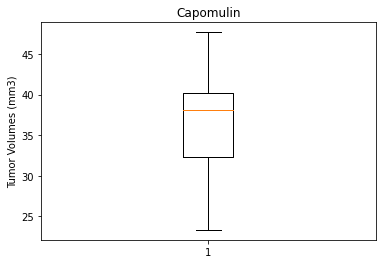

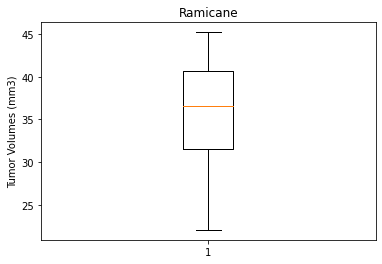

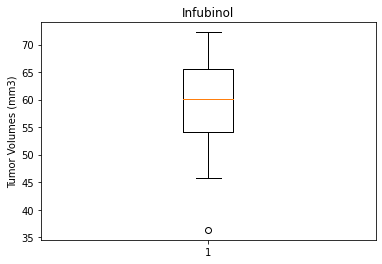

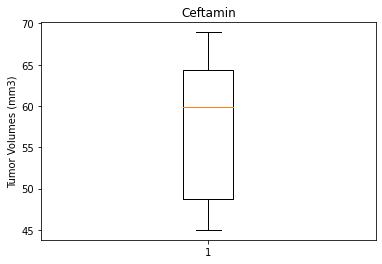

In [141]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(ca_tumor_volume)
plt.title("Capomulin")
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(ra_tumor_volume)
plt.title("Ramicane")
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(in_tumor_volume)
plt.title("Infubinol")
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(ce_tumor_volume)
plt.title("Ceftamin")
plt.show()

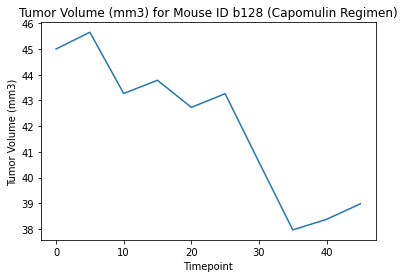

In [111]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capumulin_over_time = pd.DataFrame(clean_mouse_data.loc[clean_mouse_data['Drug Regimen']=='Capomulin'])

mouse_over_time = pd.DataFrame(capumulin_over_time.loc[capumulin_over_time['Mouse ID']=='b128'])


x_axis = mouse_over_time['Timepoint']
y_axis = mouse_over_time['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.title('Tumor Volume (mm3) for Mouse ID b128 (Capomulin Regimen)')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

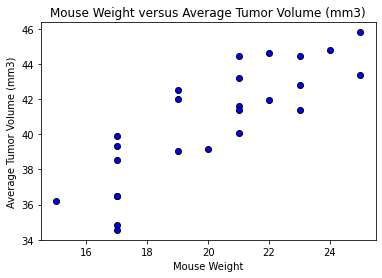

In [120]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_versus_tumor = capumulin_over_time.groupby('Mouse ID').mean(['Tumor Volume (mm3)'])


plt.scatter(weight_versus_tumor['Weight (g)'], weight_versus_tumor['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")

plt.title('Mouse Weight versus Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')

In [138]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

weight = weight_versus_tumor['Weight (g)']
avg_tumor_volume = weight_versus_tumor['Tumor Volume (mm3)']
correlation = st.pearsonr(weight, avg_tumor_volume)
print(f"The correlation between mouse weight and avg_tumor_volume is {round(correlation[0],2)}")

The correlation between mouse weight and avg_tumor_volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

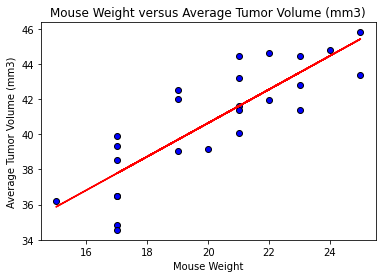

In [136]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

weight_versus_tumor = capumulin_over_time.groupby('Mouse ID').mean(['Tumor Volume (mm3)'])


plt.scatter(weight_versus_tumor['Weight (g)'], weight_versus_tumor['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_versus_tumor['Weight (g)'], weight_versus_tumor['Tumor Volume (mm3)'])
regress_values = (weight_versus_tumor['Weight (g)']) * slope + intercept

plt.plot(weight_versus_tumor['Weight (g)'],regress_values,"r-")

plt.title('Mouse Weight versus Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
